In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
import math
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Bitcoin Time Series Prediction
The goal of this project is to develop various models to predict the future price of bitcoin. The data set consists of the open and close prices of bitcoin from january 2012 to march 2019, gathered from Coinbase.

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. If you don't know what Bitcoin is , then get some knowledge about Bitcoin https://www.coindesk.com/information/what-is-bitcoin .

In [4]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s')

In [7]:
df.set_index('date', inplace=True)

In [8]:
df.drop('Timestamp',axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099760 entries, 2014-12-01 05:33:00 to 2019-01-07 22:06:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 128.2 MB


In [10]:
df.index

DatetimeIndex(['2014-12-01 05:33:00', '2014-12-01 05:34:00',
               '2014-12-01 05:35:00', '2014-12-01 05:36:00',
               '2014-12-01 05:37:00', '2014-12-01 05:38:00',
               '2014-12-01 05:39:00', '2014-12-01 05:40:00',
               '2014-12-01 05:41:00', '2014-12-01 05:42:00',
               ...
               '2019-01-07 21:57:00', '2019-01-07 21:58:00',
               '2019-01-07 21:59:00', '2019-01-07 22:00:00',
               '2019-01-07 22:01:00', '2019-01-07 22:02:00',
               '2019-01-07 22:03:00', '2019-01-07 22:04:00',
               '2019-01-07 22:05:00', '2019-01-07 22:06:00'],
              dtype='datetime64[ns]', name='date', length=2099760, freq=None)

In [11]:
df = df.resample(rule='D').mean()

In [12]:
df.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10',
               ...
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01',
               '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', name='date', length=1499, freq='D')

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1465 entries, 2014-12-01 to 2019-01-07
Data columns (total 7 columns):
Open                 1465 non-null float64
High                 1465 non-null float64
Low                  1465 non-null float64
Close                1465 non-null float64
Volume_(BTC)         1465 non-null float64
Volume_(Currency)    1465 non-null float64
Weighted_Price       1465 non-null float64
dtypes: float64(7)
memory usage: 91.6 KB


In [15]:
#Dropped the missing values since most of them were in the early stages of bitcoin trading, 
#when technical outtages were common or trading volume was virtually non existant

In [16]:
#Frequency is set for daily periods, which will be the window of time for each data point in the analysis

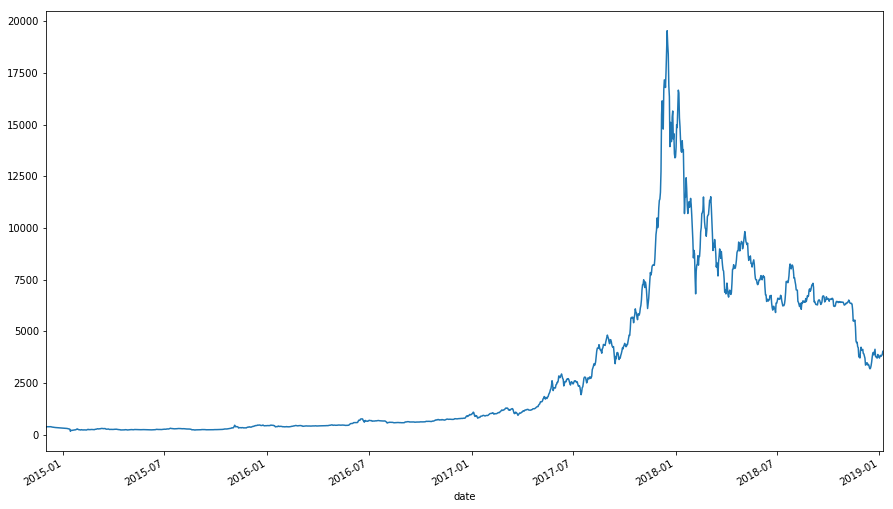

In [17]:
df['Close'].plot(figsize=(15,9)).autoscale(axis='x',tight=True)

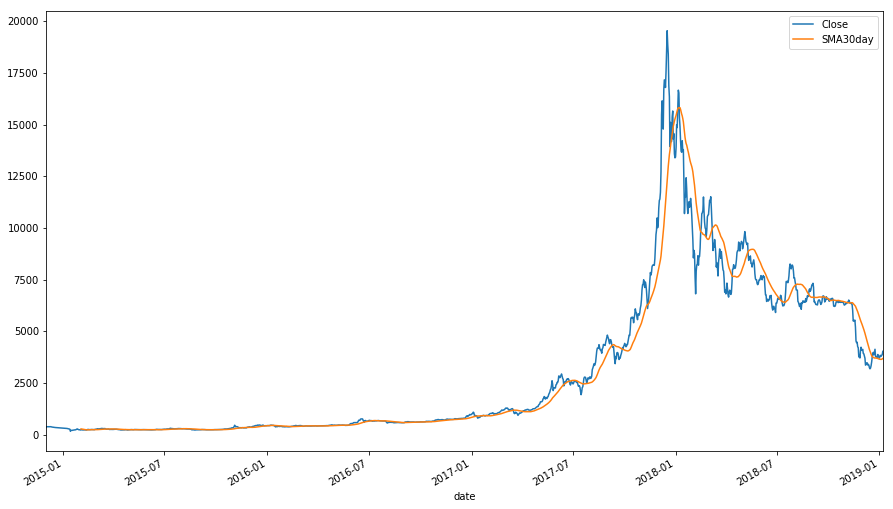

In [18]:
# Simple Moving Average
df['SMA30day'] = df['Close'].rolling(window=30).mean()
df[['Close','SMA30day']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

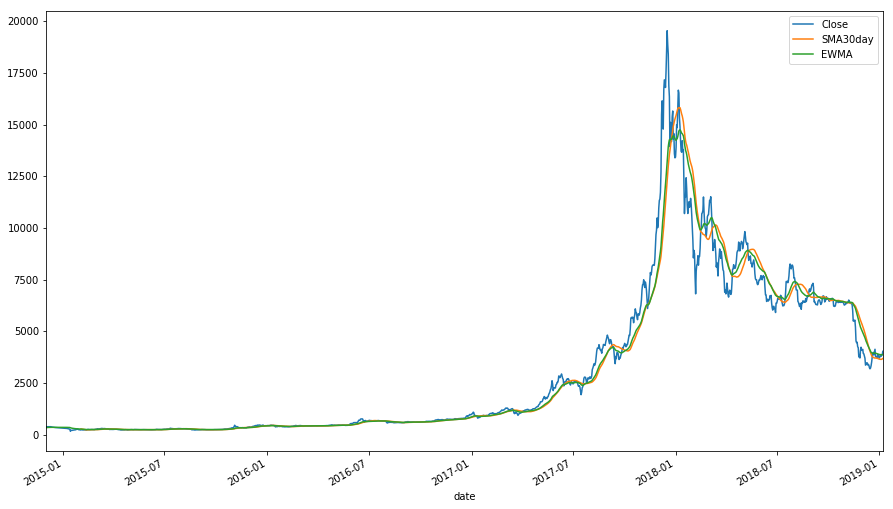

In [19]:
# Exponentially Weighted Moving Average
df['EWMA'] = df['Close'].ewm(span=30, adjust=False).mean()
df[['Close','SMA30day','EWMA']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

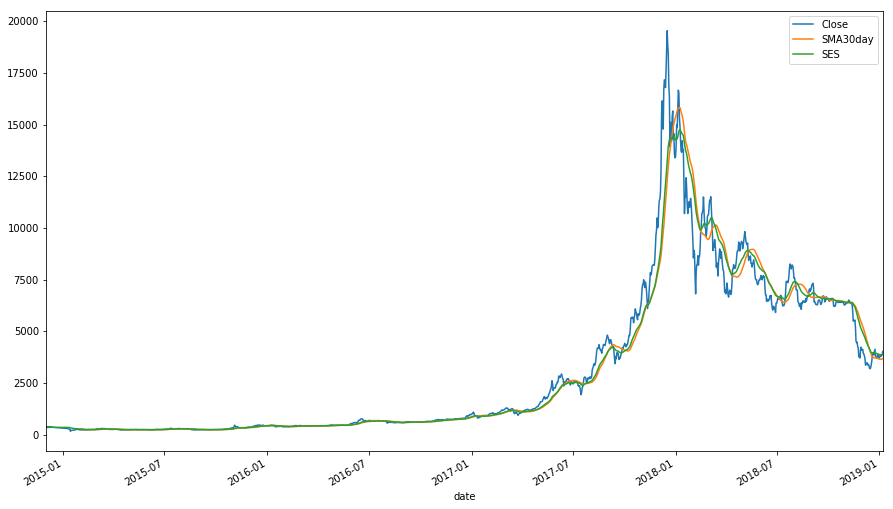

In [20]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['SES'] = SimpleExpSmoothing(df['Close']).fit(smoothing_level=2/(30+1),optimized=False).fittedvalues.shift(-1)
df[['Close','SMA30day','SES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [21]:
# Simple exponential smoothing and Exponential weighted moving average resulted in the same fitting as they overlap 
# each other perfectly. Simple moving average was the worst fit since it seems to follow a more general trend, which
# makes sense since its the mean of the time series. 

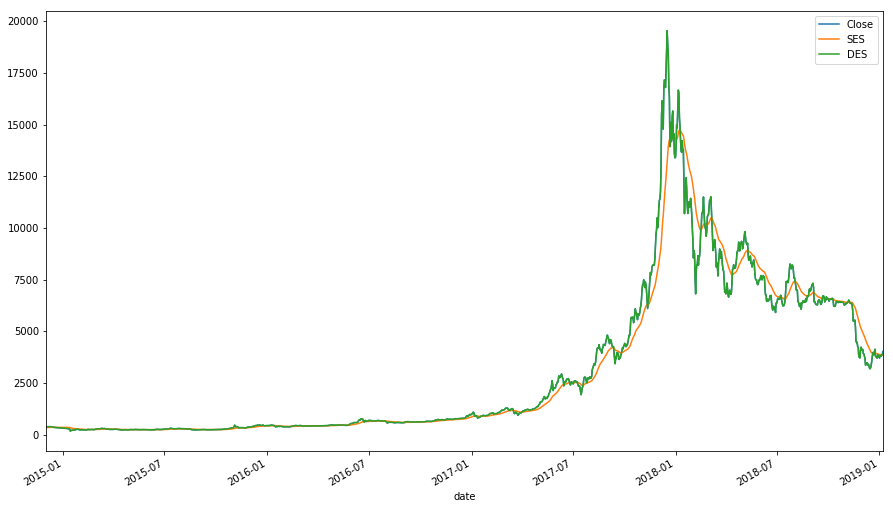

In [22]:
# Double Exponential Smoothing --> add Beta which addresses trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DES'] = ExponentialSmoothing(df['Close'], trend='add').fit().fittedvalues.shift(-1)
df[['Close','SES','DES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

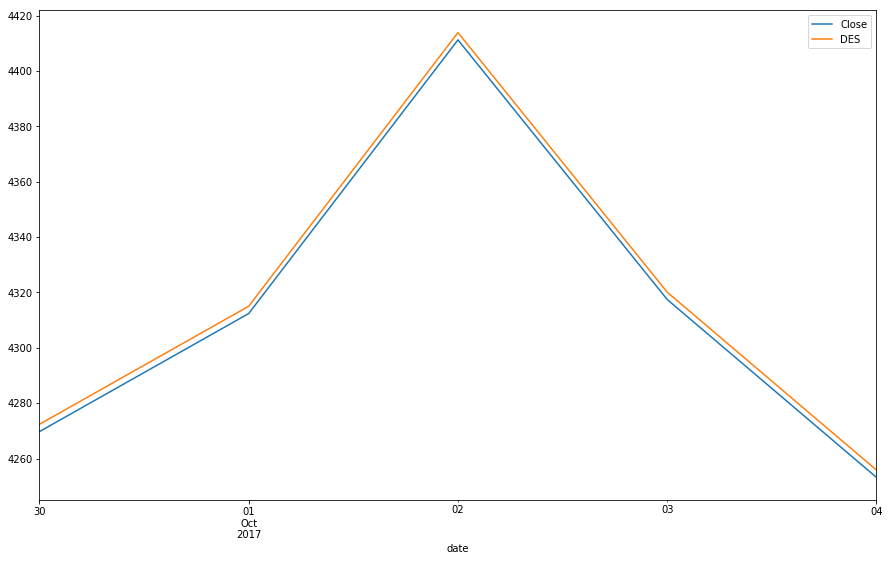

In [133]:
df[['Close','DES']][1000:1005].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [148]:
# Double Exponential Smoothing has a very close fit to the actual time series, just slightly above when zoomed in close

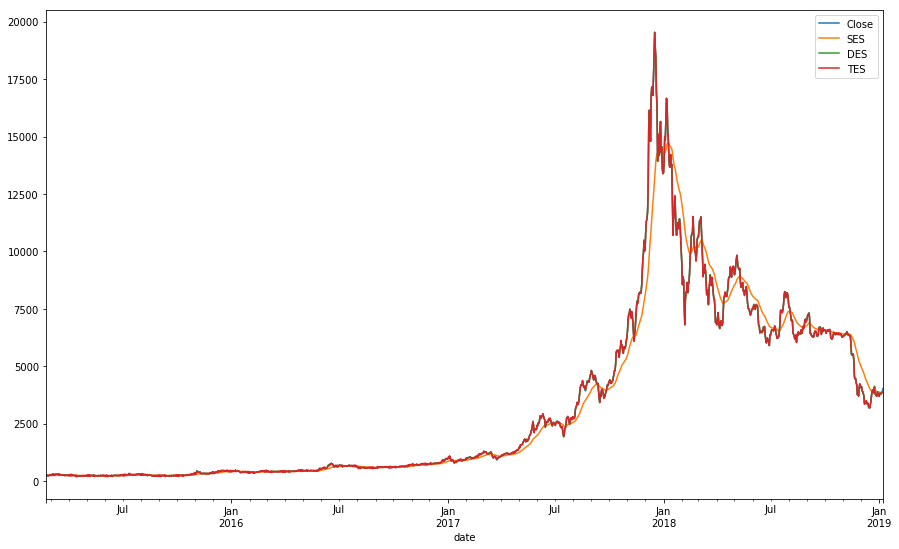

In [141]:
# Triple Exponential Smoothing --> add Gamma which addresses seasonality
df['TES'] = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=30).fit().fittedvalues.shift(-1)
df[['Close','SES','DES','TES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

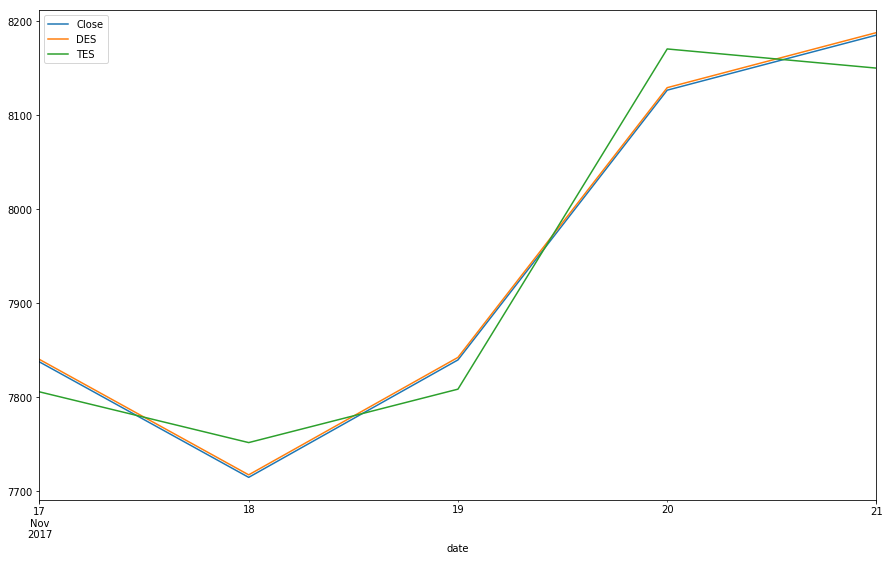

In [142]:
df[['Close','DES','TES']][1000:1005].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [173]:
# It seems like Triple Exponential Smoothing did a worse job fitting into the time series, maybe because the seasonality
# is hard to see visually

# Modeling
The goal now is to use Exponential Smoothing, ARIMA and Keras to model the data and create predictions for the future. Models will be scored on MSE and RMSE to decide what model has the least errors and is more accurate in its predictions. 

When it comes to the train test split, the break for the test set will be starting in 9/1/2018, going into 2019. So that will be about 4 months+ worth of data, which will allow the model to predict by that same amount of time into the future. The big spike at the end of 2017 could throw the models off so that's why the training set will be larger.

In [23]:
df.iloc[1336]

Open                  7104.848236
High                  7105.695451
Low                   7104.110521
Close                 7104.966757
Volume_(BTC)             4.300555
Volume_(Currency)    30729.231052
Weighted_Price        7104.910531
SMA30day              6642.326358
EWMA                  6788.040807
SES                   6788.040807
DES                   7107.607210
Name: 2018-09-01 00:00:00, dtype: float64

In [23]:
#Split at location 1336 which refers to 09/01/2018 at 12 am
train = df['Close'][:1336]
test = df['Close'][1336:]

In [227]:
# Double exponential smoothing modelling, since I can't tell if there is a seasonality factor, but there is kind of
# a growth trend if you ignore the mania of 2018
fitted_DES_model1 = ExponentialSmoothing(train, trend='add').fit(smoothing_level=.36, smoothing_slope=-.02)
fitted_DES_model2 = ExponentialSmoothing(train, trend='add').fit(optimized=True)
fitted_DES_predictions1 = fitted_DES_model1.forecast(129)
fitted_DES_predictions2 = fitted_DES_model2.forecast(129)
fitted_DES_predictions1.index = test.index
fitted_DES_predictions2.index = test.index

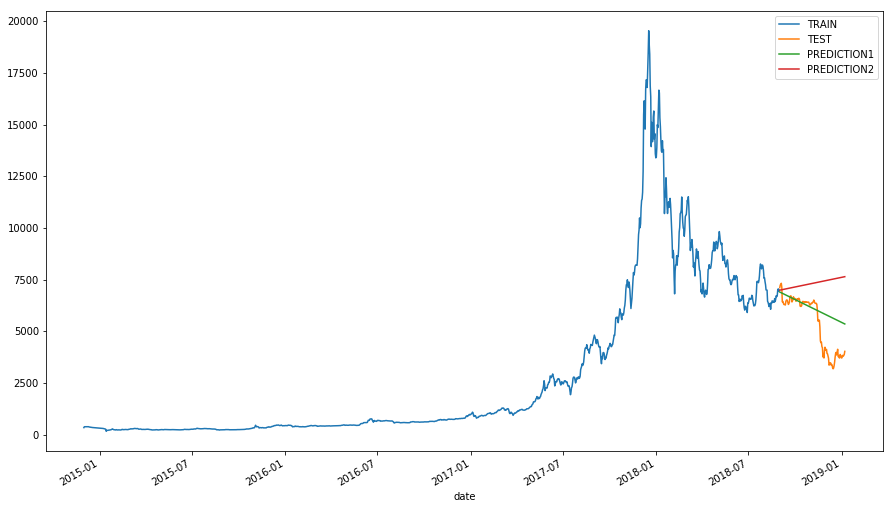

In [228]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(15,9))
fitted_DES_predictions1.plot(legend=True,label='PREDICTION1')
fitted_DES_predictions2.plot(legend=True,label='PREDICTION2');

In [229]:
fitted_DES_error1 = rmse(test, fitted_DES_predictions1)
fitted_DES_error2 = rmse(test, fitted_DES_predictions2)
print(fitted_DES_error1)
print(fitted_DES_error2)

1169.5323905954817
2402.73190321933


In [39]:
# The prediction returned by the double exponential smoothing model with optimized parameters more or less reflects the 
# trend that was present since the beginning of the time series, ignoring the big spike. With the tunning of alpha and 
# beta, the slope changed to reflect the mean of the time series in more recent periods, which could represent a more 
# accurate forecast in the new range. Seems like this model is too simplistic for a time series as volatile as this one.

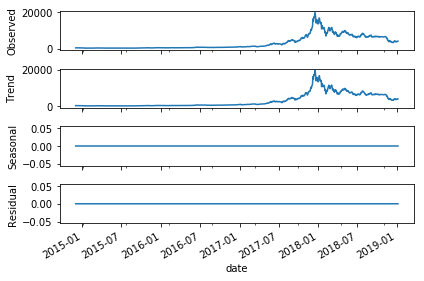

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'], model='additive', freq=1)
fig = result.plot()

# Stationarity

In [184]:
# When it comes to seasonality, It's pretty hard to tell if there is visually since the chart is so volatile, but since 
# its an important input for the models we are about to implement, the augmented dickey fuller test will help clarify 
# this issue.

In [295]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")

    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [29]:
adf_test(df['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.804238
p-value                    0.378360
# lags used               24.000000
# observations          1440.000000
critical value (1%)       -3.434899
critical value (5%)       -2.863549
critical value (10%)      -2.567840
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [16]:
# With a p value greater than 0.05, the ADF test classifies this time series as non stationary. In order to model with 
# ARIMA the series has to be stationary, which is accomplished with diferencing. 

# Determining p,q,d

In [1]:
from pmdarima.arima import auto_arima

In [311]:
stepwise_fit = auto_arima(df['Close'], start_p=0, start_q=0, max_p=10, max_q=10, m=1,
                         seasonal=False, d=None, trace=True, error_action='ignore',
                         suppress_warnings=True, stepwise=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=20064.280, BIC=20074.858, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0); AIC=20008.875, BIC=20024.742, Fit time=0.046 seconds
Fit ARIMA: order=(0, 1, 1); AIC=20014.174, BIC=20030.041, Fit time=0.042 seconds
Fit ARIMA: order=(2, 1, 0); AIC=20010.170, BIC=20031.325, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=20010.409, BIC=20031.564, Fit time=0.124 seconds
Fit ARIMA: order=(2, 1, 1); AIC=19990.197, BIC=20016.641, Fit time=0.360 seconds
Fit ARIMA: order=(3, 1, 1); AIC=19989.999, BIC=20021.733, Fit time=0.379 seconds
Fit ARIMA: order=(3, 1, 0); AIC=20007.854, BIC=20034.299, Fit time=0.067 seconds
Fit ARIMA: order=(3, 1, 2); AIC=19984.074, BIC=20021.097, Fit time=0.878 seconds
Fit ARIMA: order=(4, 1, 3); AIC=19981.746, BIC=20029.347, Fit time=1.093 seconds
Fit ARIMA: order=(3, 1, 3); AIC=19991.997, BIC=20034.308, Fit time=1.070 seconds
Fit ARIMA: order=(5, 1, 3); AIC=19970.344, BIC=20023.234, Fit time=1.817 seconds
Fit ARIMA: order=(5, 1, 2); 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1464
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9975.172
Method:                       css-mle   S.D. of innovations            220.093
Date:                Wed, 17 Apr 2019   AIC                          19970.344
Time:                        10:08:36   BIC                          20023.234
Sample:                             1   HQIC                         19990.071
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4719      7.109      0.207      0.836     -12.462      15.406
ar.L1.D.y      0.7258      0.050     14.381      0.000       0.627       0.825
ar.L2.D.y      0.1438      0.074      1.952      0.051      -0.001       0.288
ar.L3.D.y     -0.9508      0.046    -20.593      0.000      -1.041      -0.860
ar.L4.D.y      0.2573      0.032      7.919      0.000       0.194       0.321
ar.L5.D.y     -0.0691      0.028     -2.462      0.014      -0.124      -0.014
ma.L1.D.y     -0.5312      0.044    -12.027      0.000      -0.618      -0.445
ma.L2.D.y     -0.2307      0.062     -3.729      0.000      -0.352      -0.109
ma.L3.D.y      0.8657      0.044     19.561      0.000       0.779       0.952
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0728           -0.0000j            1.0728           -0.5000
AR.2            0.7261           -0.7137j            1.0182           -0.1236
AR.3            0.7261           +0.7137j            1.0182            0.1236
AR.4            1.6709           -3.1960j            3.6064           -0.1733
AR.5            1.6709           +3.1960j            3.6064            0.1733
MA.1            0.7067           -0.7127j            1.0036           -0.1257
MA.2            0.7067           +0.7127j            1.0036            0.1257
MA.3           -1.1468           -0.0000j            1.1468           -0.5000
-----------------------------------------------------------------------------
"""

In [17]:
# Using auto_arima to determine the ARIMA orders, the algorythm came up with 5,1,3 values for p,q,d. This is the best
# way to calculate these values, but I will explore the manual ways up next

In [296]:
from statsmodels.tsa.statespace.tools import diff
df['Diff1'] = diff(df['Close'], k_diff=1)
adf_test(df['Diff1'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.819156e+00
p-value                 2.022711e-09
# lags used             2.300000e+01
# observations          1.440000e+03
critical value (1%)    -3.434899e+00
critical value (5%)    -2.863549e+00
critical value (10%)   -2.567840e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


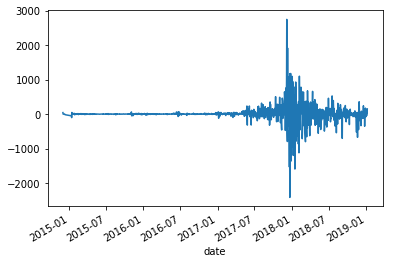

In [297]:
df['Diff1'].plot()

In [ ]:
# This confirms the resulting time series is stationary

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

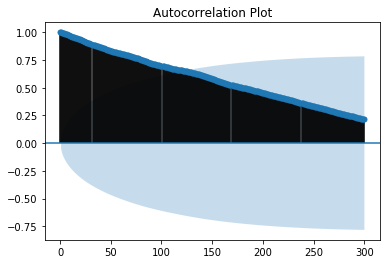

In [35]:
plot_acf(df['Close'], title='Autocorrelation Plot', lags=300);

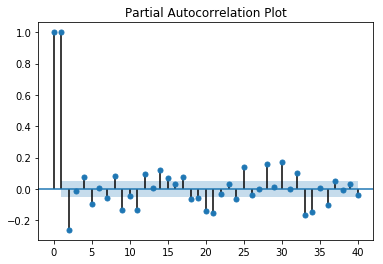

In [36]:
plot_pacf(df['Close'], title='Partial Autocorrelation Plot', lags=40);

In [33]:
# The graph indicate that the AR component is more important than MA

# ARIMA Modeling

In [28]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [29]:
ARIMA_model = ARIMA(train, order=(5,1,3))
ARIMA_results = ARIMA_model.fit()
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1335
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9130.431
Method:                       css-mle   S.D. of innovations            225.817
Date:                Sat, 20 Apr 2019   AIC                          18280.862
Time:                        23:25:30   BIC                          18332.829
Sample:                             1   HQIC                         18300.334
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9683      7.621      0.652      0.515      -9.969      19.905
ar.L1.D.Close     0.7233      0.053     13.718      0.000       0.620       0.827
ar.L2.D.Close     0.1457      0.077      1.898      0.058      -0.005       0.296
ar.L3.D.Close    -0.9474      0.047    -19.954      0.000      -1.040      -0.854
ar.L4.D.Close     0.2579      0.034      7.534      0.000       0.191       0.325
ar.L5.D.Close    -0.0728      0.030     -2.462      0.014      -0.131      -0.015
ma.L1.D.Close    -0.5297      0.046    -11.494      0.000      -0.620      -0.439
ma.L2.D.Close    -0.2322      0.065     -3.598      0.000      -0.359      -0.106
ma.L3.D.Close     0.8635      0.046     18.749      0.000       0.773       0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0714           -0.0000j            1.0714           -0.5000
AR.2            0.7290           -0.7140j            1.0204           -0.1233
AR.3            0.7290           +0.7140j            1.0204            0.1233
AR.4            1.5782           -3.1342j            3.5092           -0.1758
AR.5            1.5782           +3.1342j            3.5092            0.1758
MA.1            0.7078           -0.7133j            1.0049           -0.1256
MA.2            0.7078           +0.7133j            1.0049            0.1256
MA.3           -1.1467           -0.0000j            1.1467           -0.5000
-----------------------------------------------------------------------------
"""

In [53]:
history = [x for x in train]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

# The loop goes over each value in the test set and fits it to an ARIMA model to calculate the predicted value. 
# This value is then compared to the next test set data point and the error is computed 

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 3))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test[t]
    history.append(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

Printing Predicted vs Expected Values...


predicted = 6950.350511,   expected = 7104.966757,   error = 2.176171  %
predicted = 7097.239896,   expected = 7238.336285,   error = 1.949293  %
predicted = 7269.784190,   expected = 7257.905347,   error = 0.163668  %
predicted = 7306.844518,   expected = 7318.272694,   error = 0.156159  %
predicted = 7389.312392,   expected = 7127.171639,   error = 3.678047  %
predicted = 7134.097321,   expected = 6422.379278,   error = 11.081844  %
predicted = 6270.819843,   expected = 6445.112875,   error = 2.704267  %
predicted = 6410.212383,   expected = 6361.866361,   error = 0.759935  %
predicted = 6297.512270,   expected = 6294.207403,   error = 0.052506  %
predicted = 6208.877634,   expected = 6288.220667,   error = 1.261772  %
predicted = 6331.209356,   expected = 6291.030597,   error = 0.638667  %
predicted = 6337.087975,   expected = 6268.032736,   error = 1.101705  %
predicted = 6363.545775,   expected = 6440.470868,   error = 1.194402  %
predict

predicted = 3970.294236,   expected = 3852.437201,   error = 3.059285  %
predicted = 3800.550382,   expected = 3978.720118,   error = 4.478067  %
predicted = 3994.709554,   expected = 4126.227799,   error = 3.187372  %
predicted = 4156.957667,   expected = 3773.757590,   error = 10.154337  %
predicted = 3713.285778,   expected = 3775.166544,   error = 1.639153  %
predicted = 3797.910125,   expected = 3717.630069,   error = 2.159442  %
predicted = 3739.486737,   expected = 3701.222937,   error = 1.033815  %
predicted = 3673.158132,   expected = 3874.174056,   error = 5.188614  %
predicted = 3911.867880,   expected = 3788.977889,   error = 3.243355  %
predicted = 3740.281885,   expected = 3756.603222,   error = 0.434471  %
predicted = 3752.248681,   expected = 3700.670507,   error = 1.393752  %
predicted = 3701.014334,   expected = 3823.210257,   error = 3.196160  %
predicted = 3864.502746,   expected = 3829.922118,   error = 0.902907  %
predicted = 3850.779780,   expected = 3785.405590,

In [56]:
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
print('RMSE: '+ str(rmse(originals,predictions)))

Mean Error in Predicting Test Case Articles : 1.982446  %
RMSE: 149.04451446376518


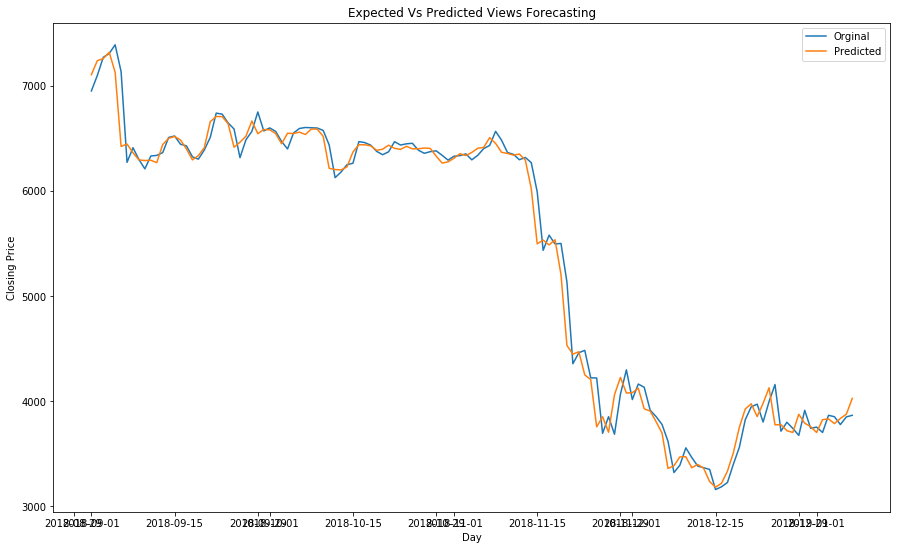

In [381]:
plt.figure(figsize=(15, 9))
test_day = [t
           for t in range(len(test))]
labels={'Orginal','Predicted'}
plt.plot(test.index,predictions)
plt.plot(test.index, originals)
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [ ]:
# With the model being fitted on a daily basis to predict the next day's price, the predictions are pretty accurate,
# off by 1.98% from the mean of the test series.

In [386]:
# Below is an attempt to model over the entire test period, with the training set fit entirely once. Not very accurate
# with a RMSE of 2,386.87. Like the double exponential smoothing model, ARIMA tries to fit the prediction to the mean of
# the training time series.

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
ARIMA_predictions = ARIMA_results.predict(start=start, end=end, dynamic=True, typ='levels')

In [332]:
ARIMA_predictions.index = test.index

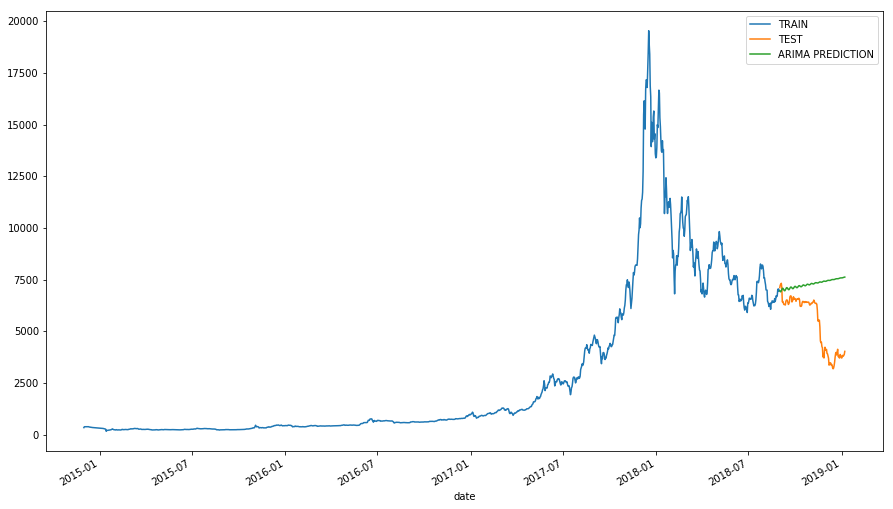

In [328]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(15,9))
ARIMA_predictions.plot(legend=True,label='ARIMA PREDICTION');

In [43]:
#Model evaluation

In [42]:
ARIMA_error = rmse(test, ARIMA_predictions)
print(ARIMA_error)

2386.870689446252


# Second modelling atempt, with the log of the time series this time

In [95]:
#df_log = df_log.resample(rule='D').mean()

In [96]:
#df_log.dropna(inplace=True)

In [139]:
from numpy import log
df_log = log(df['Close'])

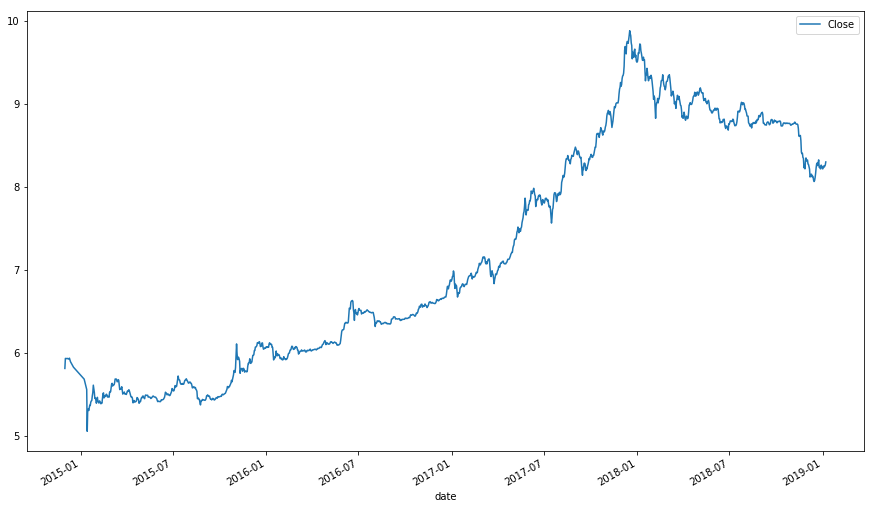

In [231]:
df_log.plot(legend=True,figsize=(15,9))

In [100]:
# This is a much less volatile time series, closer to linear growth than exponential. 2nd modelling attempt with
# exponential smoothing and ARIMA

In [48]:
df_log.iloc[1336]

8.868549361694699

In [140]:
train_log = df_log[:1336]
test_log = df_log[1336:]

In [233]:
len(df_log)

1465

In [289]:
fitted_DES_model_log1 = ExponentialSmoothing(train_log, trend='add').fit(smoothing_level=.95, smoothing_slope=0.01)
fitted_DES_model_log2 = ExponentialSmoothing(train_log, trend='add').fit(optimized=True)
fitted_DES_predictions_log1 = fitted_DES_model_log1.forecast(129)
fitted_DES_predictions_log2 = fitted_DES_model_log2.forecast(129)
fitted_DES_predictions_log1.index = test_log.index
fitted_DES_predictions_log2.index = test_log.index

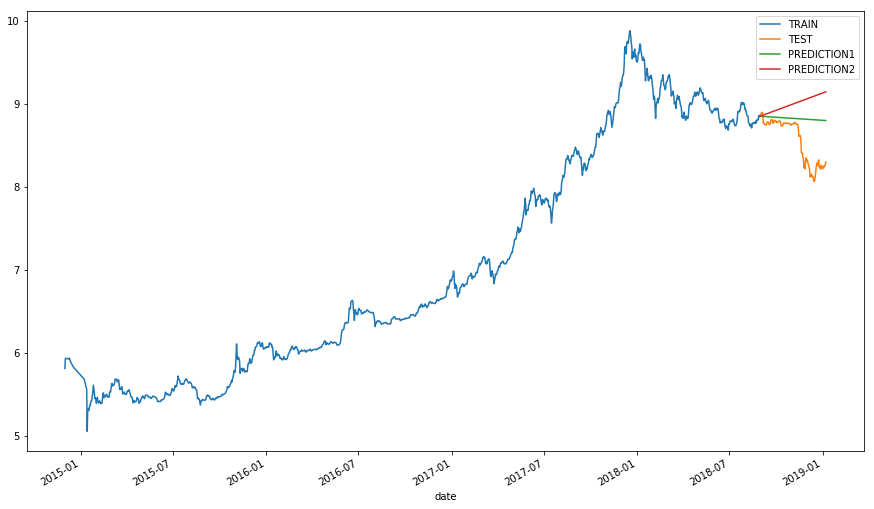

In [291]:
train_log.plot(legend=True,label='TRAIN')
test_log.plot(legend=True,label='TEST',figsize=(15,9))
fitted_DES_predictions_log1.plot(legend=True,label='PREDICTION1')
fitted_DES_predictions_log2.plot(legend=True,label='PREDICTION2');

In [387]:
fitted_DES_error_log1 = rmse(test_log, fitted_DES_predictions_log1)
fitted_DES_error_log2 = rmse(test_log, fitted_DES_predictions_log2)
print(fitted_DES_error_log1)
print(fitted_DES_error_log2)

0.3609113158505084
0.5513718831114061


In [388]:
# Similar situation as the previous attempt, the optimized version follows the trend of the time series as a whole,
# while the one with the custom values of alpha and beta more closely resembles the mean for the more recent periods.
# However, the sharp drop off towards the end invalidates these models as its way off from the predictions 

In [360]:
#ARIMA

In [362]:
stepwise_fit_log = auto_arima(df_log, start_p=0, start_q=0, max_p=10, max_q=10, m=1,
                         seasonal=False, d=None, trace=True, error_action='ignore',
                         suppress_warnings=True, stepwise=True)
stepwise_fit_log.summary()

Fit ARIMA: order=(0, 1, 0); AIC=-5590.912, BIC=-5580.334, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-5624.996, BIC=-5609.129, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-5624.284, BIC=-5608.418, Fit time=0.028 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-5622.996, BIC=-5601.840, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-5622.996, BIC=-5601.840, Fit time=0.121 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-5621.356, BIC=-5594.911, Fit time=0.597 seconds
Total fit time: 0.826 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1464
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2815.498
Method:                       css-mle   S.D. of innovations              0.035
Date:                Wed, 17 Apr 2019   AIC                          -5624.996
Time:                        15:06:40   BIC                          -5609.129
Sample:                             1   HQIC                         -5619.078
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.568      0.117      -0.000       0.004
ar.L1.D.y      0.1566      0.026      6.044      0.000       0.106       0.207
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.3847           +0.0000j            6.3847            0.0000
-----------------------------------------------------------------------------
"""

In [137]:
ARIMA_model = ARIMA(train, order=(1,1,0))
ARIMA_results = ARIMA_model.fit()
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1335
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9155.140
Method:                       css-mle   S.D. of innovations            230.173
Date:                Thu, 18 Apr 2019   AIC                          18316.280
Time:                        11:31:07   BIC                          18331.870
Sample:                             1   HQIC                         18322.122
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9884      7.823      0.638      0.524     -10.344      20.321
ar.L1.D.Close     0.1948      0.027      7.261      0.000       0.142       0.247
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.1323           +0.0000j            5.1323            0.0000
-----------------------------------------------------------------------------
"""

In [141]:
history = [x for x in train_log]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
# We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_log)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_log[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

Printing Predicted vs Expected Values...


predicted = 7002.491681,   expected = 7104.966757,   error = 1.442302  %
predicted = 7138.132646,   expected = 7238.336285,   error = 1.384346  %
predicted = 7273.301697,   expected = 7257.905347,   error = 0.212132  %
predicted = 7275.155997,   expected = 7318.272694,   error = 0.589165  %
predicted = 7341.996015,   expected = 7127.171639,   error = 3.014160  %
predicted = 7112.063914,   expected = 6422.379278,   error = 10.738772  %
predicted = 6331.162416,   expected = 6445.112875,   error = 1.768013  %
predicted = 6460.742995,   expected = 6361.866361,   error = 1.554208  %
predicted = 6360.987202,   expected = 6294.207403,   error = 1.060972  %
predicted = 6295.520717,   expected = 6288.220667,   error = 0.116091  %
predicted = 6298.984191,   expected = 6291.030597,   error = 0.126428  %
predicted = 6303.152515,   expected = 6268.032736,   error = 0.560300  %
predicted = 6276.104500,   expected = 6440.470868,   error = 2.552086  %
predict

predicted = 3987.293897,   expected = 3852.437201,   error = 3.500555  %
predicted = 3838.852222,   expected = 3978.720118,   error = 3.515399  %
predicted = 4005.054565,   expected = 4126.227799,   error = 2.936659  %
predicted = 4156.445498,   expected = 3773.757590,   error = 10.140766  %
predicted = 3726.066542,   expected = 3775.166544,   error = 1.300605  %
predicted = 3780.745890,   expected = 3717.630069,   error = 1.697743  %
predicted = 3713.863841,   expected = 3701.222937,   error = 0.341533  %
predicted = 3703.840326,   expected = 3874.174056,   error = 4.396646  %
predicted = 3907.737436,   expected = 3788.977889,   error = 3.134343  %
predicted = 3781.143301,   expected = 3756.603222,   error = 0.653252  %
predicted = 3756.847063,   expected = 3700.670507,   error = 1.518010  %
predicted = 3697.143604,   expected = 3823.210257,   error = 3.297403  %
predicted = 3848.237216,   expected = 3829.922118,   error = 0.478211  %
predicted = 3836.418872,   expected = 3785.405590,


 Mean Error in Predicting Test Case Articles : 1.994746  %


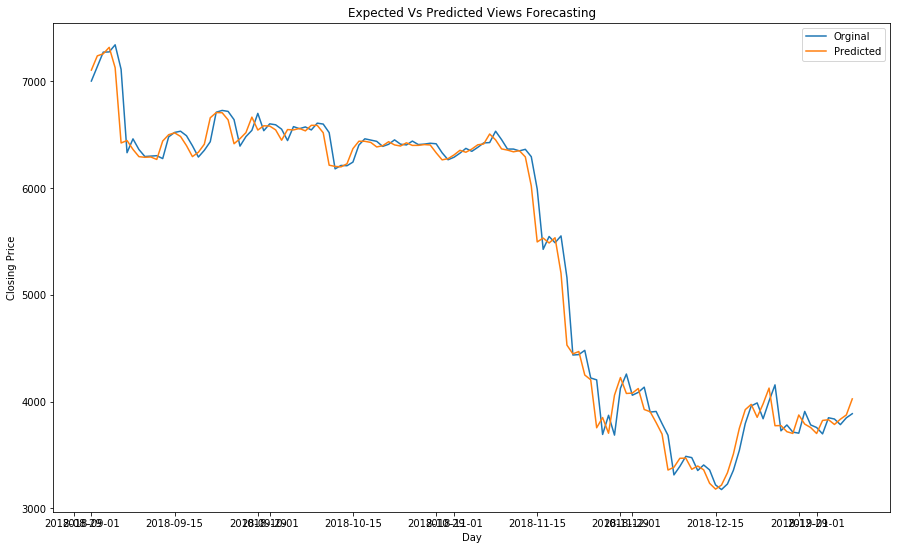

In [142]:
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plt.figure(figsize=(15, 9))
test_day = [t
           for t in range(len(test))]
labels={'Orginal','Predicted'}
plt.plot(test.index,predictions)
plt.plot(test.index, originals)
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

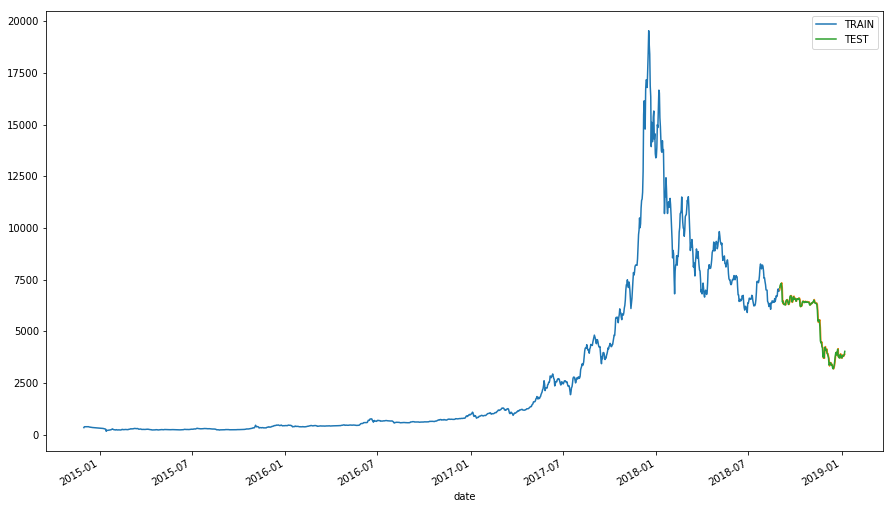

In [143]:
train.plot(legend=True,label='TRAIN')
plt.plot(test.index,predictions)
labels={'Predicted'}
test.plot(legend=True,label='TEST',figsize=(15,9))

In [ ]:
# The second attempt of ARIMA yielded negligibly worse results when modeling with the log of the time series vs its 
#original shape. The error from the mean was 1.99%, which is slightly above the 1.98% error when modeling the series
# without log transforming it. 

# modeling with KERAS

In [33]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [34]:
# fix random seed for reproducibility
np.random.seed(7)

In [35]:
df_keras = pd.DataFrame(df['Close'])

In [36]:
df_keras['Close_t+1'] = df_keras['Close'].shift(-1)

In [37]:
train_keras = df_keras[:1336]
test_keras = df_keras[1336:]

In [38]:
trainX = np.array(train_keras['Close'])
trainY = np.array(train_keras['Close_t+1'])
testX = np.array(test_keras['Close'][:-1])
testY = np.array(test_keras['Close_t+1'][:-1])

In [39]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1336/1336 [==============================] - 0s 349us/step - loss: 11247849.3653
Epoch 2/200
1336/1336 [==============================] - 0s 246us/step - loss: 447239.3924
Epoch 3/200
1336/1336 [==============================] - 0s 247us/step - loss: 56948.4164
Epoch 4/200
1336/1336 [==============================] - 0s 279us/step - loss: 56793.8369
Epoch 5/200
1336/1336 [==============================] - 0s 264us/step - loss: 56353.8735
Epoch 6/200
1336/1336 [==============================] - 0s 253us/step - loss: 58167.4570
Epoch 7/200
1336/1336 [==============================] - 0s 251us/step - loss: 56159.5087
Epoch 8/200
1336/1336 [==============================] - 0s 247us/step - loss: 57367.6100
Epoch 9/200
1336/1336 [==============================] - 0s 257us/step - loss: 60302.7469
Epoch 10/200
1336/1336 [==============================] - 0s 241us

1336/1336 [==============================] - 0s 248us/step - loss: 56668.9674
Epoch 174/200
1336/1336 [==============================] - 0s 262us/step - loss: 59437.0914
Epoch 175/200
1336/1336 [==============================] - 0s 255us/step - loss: 58095.2210
Epoch 176/200
1336/1336 [==============================] - 0s 262us/step - loss: 60217.5516
Epoch 177/200
1336/1336 [==============================] - 0s 247us/step - loss: 59616.9531
Epoch 178/200
1336/1336 [==============================] - 0s 257us/step - loss: 58029.8395
Epoch 179/200
1336/1336 [==============================] - 0s 258us/step - loss: 59089.6586
Epoch 180/200
1336/1336 [==============================] - 0s 261us/step - loss: 59837.8816
Epoch 181/200
1336/1336 [==============================] - 0s 258us/step - loss: 58119.7131
Epoch 182/200
1336/1336 [==============================] - 0s 264us/step - loss: 59653.7058
Epoch 183/200
1336/1336 [==============================] - 0s 252us/step - loss: 58112.1804
Ep

In [40]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 55255.39 MSE (235.06 RMSE)
Test Score: 24576.51 MSE (156.77 RMSE)


In [42]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [43]:
train_plot_keras = pd.DataFrame(trainPredict, index=df_keras[:1336].index, columns=['Value'])
test_plot_keras =pd.DataFrame(testPredict, index=df_keras[1336:-1].index, columns=['Value'])

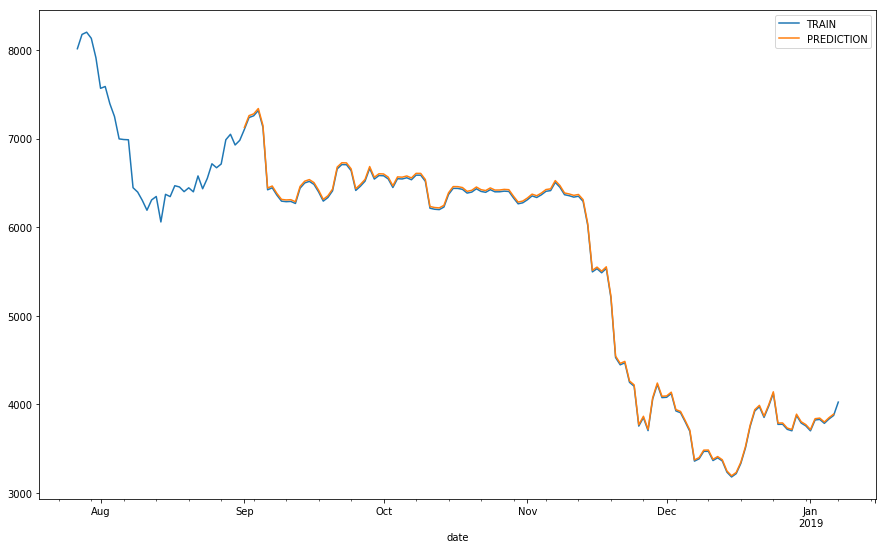

In [45]:
df_keras['Close'].iloc[1300:].plot(legend=True,label='TRAIN')
test_plot_keras['Value'].plot(legend=True,label='PREDICTION',figsize=(15,9));

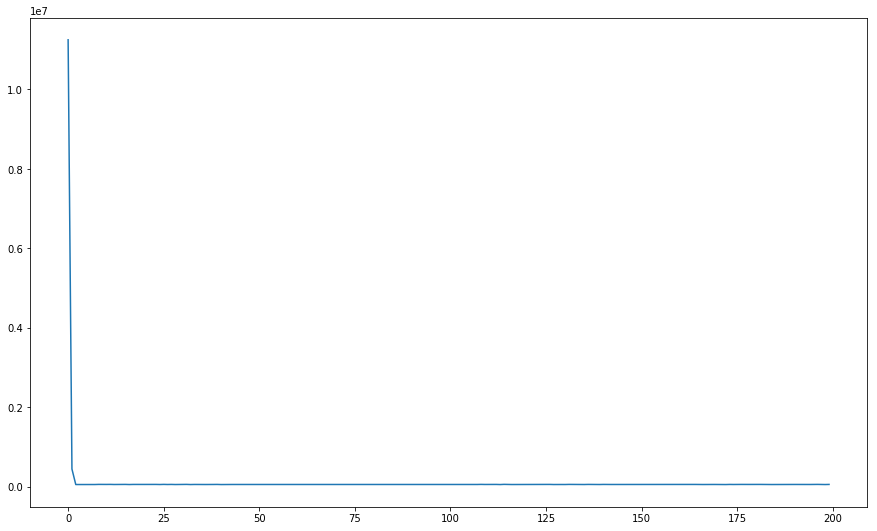

In [50]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.figure(figsize=(15,9))
plt.plot(epochs,loss)

# Modelling with Prophet

In [155]:
import fbprophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [42]:
#Initial basic implementation of prophet model

In [16]:
prophet_model = Prophet()

In [18]:
df_prophet = df['Close'].reset_index()

In [23]:
df_prophet.columns = ['ds','y']

In [24]:
prophet_model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
future = prophet_model.make_future_dataframe(periods=100)

In [111]:
forecast = prophet_model.predict(future)

In [112]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-01,369.964808,-621.517389,1319.345396,369.964808,369.964808,-49.549211,-49.549211,-49.549211,9.761710,9.761710,9.761710,-59.310921,-59.310921,-59.310921,0.0,0.0,0.0,320.415597
1,2014-12-02,369.746302,-603.024929,1379.750749,369.746302,369.746302,21.100788,21.100788,21.100788,4.181295,4.181295,4.181295,16.919493,16.919493,16.919493,0.0,0.0,0.0,390.847090
2,2014-12-03,369.527796,-536.640354,1478.026188,369.527796,369.527796,90.546083,90.546083,90.546083,-5.854116,-5.854116,-5.854116,96.400199,96.400199,96.400199,0.0,0.0,0.0,460.073879
3,2014-12-04,369.309290,-502.645524,1580.383814,369.309290,369.309290,162.304662,162.304662,162.304662,-15.726490,-15.726490,-15.726490,178.031152,178.031152,178.031152,0.0,0.0,0.0,531.613953
4,2014-12-06,368.872278,-351.954138,1709.128144,368.872278,368.872278,361.135240,361.135240,361.135240,17.914448,17.914448,17.914448,343.220792,343.220792,343.220792,0.0,0.0,0.0,730.007519


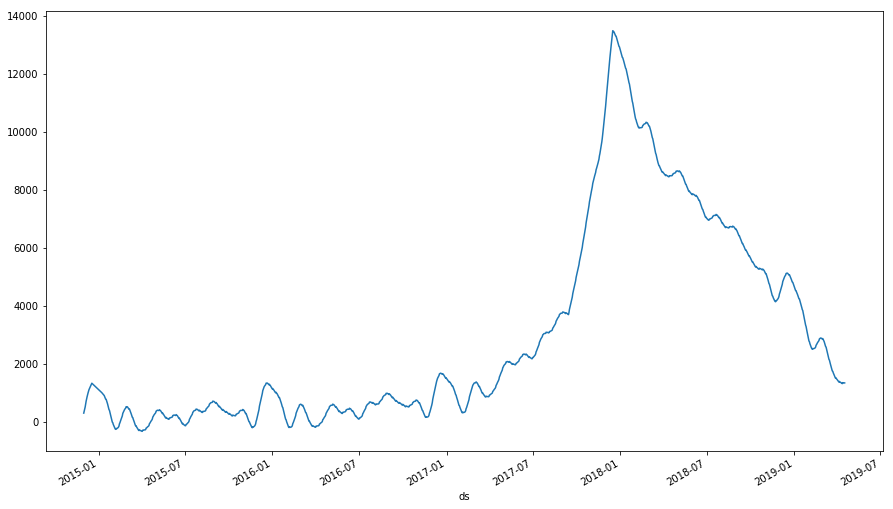

In [113]:
forecast.set_index('ds')['yhat'].plot(figsize=(15,9))

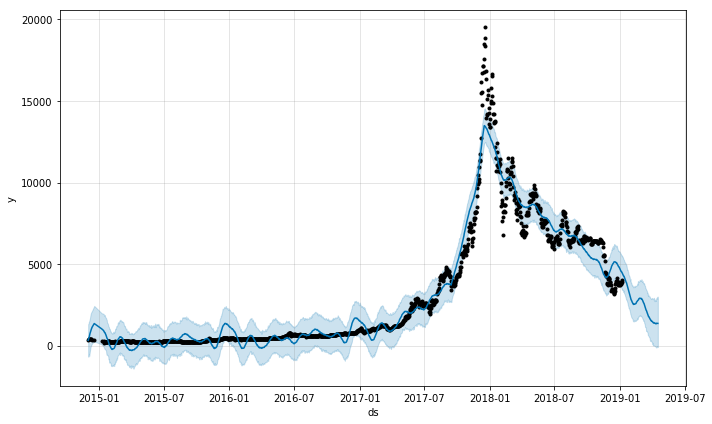

In [102]:
prophet_model.plot(forecast);

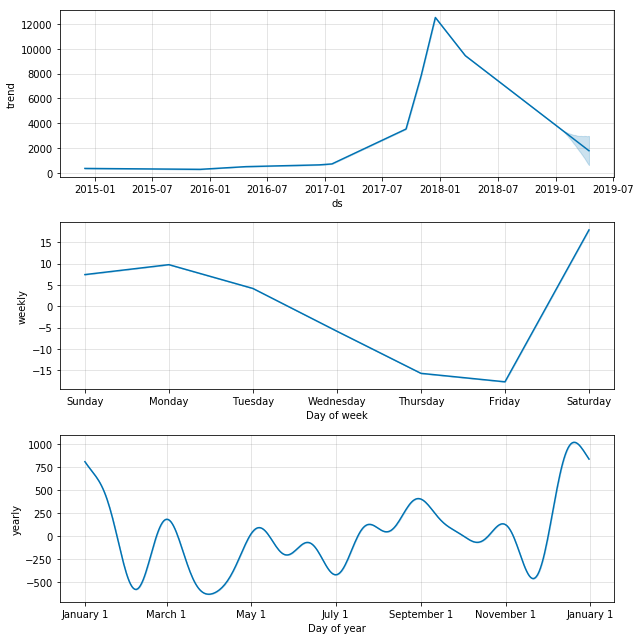

In [144]:
prophet_model.plot_components(forecast);

In [157]:
df_cv = cross_validation(prophet_model, initial='1336 days', period='365 days', horizon = '100 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-09-29 00:00:00 and 2018-09-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-09-30,5335.280953,4343.373384,6395.456417,6583.257375,2018-09-29
1,2018-10-01,5292.295823,4121.279523,6323.534081,6580.807069,2018-09-29
2,2018-10-02,5252.858403,4179.651634,6309.586457,6544.955875,2018-09-29
3,2018-10-03,5196.350790,4182.673548,6238.945221,6447.973736,2018-09-29
4,2018-10-04,5147.520411,4109.795732,6210.699611,6547.833139,2018-09-29


In [158]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
9,10 days,1.971450e+06,1404.083214,1398.984935,0.213486,0.0
10,11 days,2.063534e+06,1436.500752,1431.613229,0.218681,0.0
11,12 days,2.068510e+06,1438.231398,1433.529556,0.220144,0.0
12,13 days,2.074833e+06,1440.427907,1435.953616,0.221625,0.0
13,14 days,2.086015e+06,1444.304329,1440.343796,0.223114,0.0


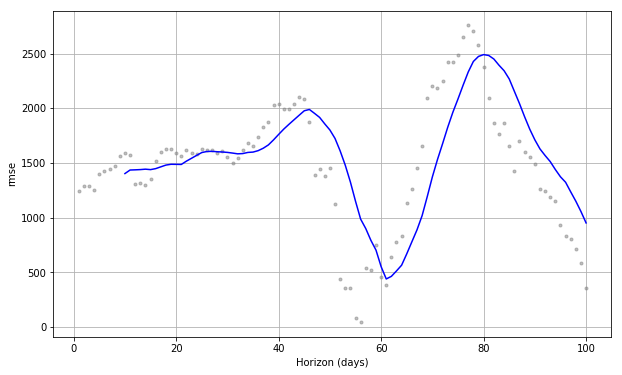

In [159]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Conclusions

By definition, it's impossible for any of these models to singlehandedly predict a time series as complex and volatile as bitcoin. Time is not the variable driving the movements of the price, there are a lot more variables involved, such as economic factors, psychological factors, mania by retail investors, etc. Every implementation I saw while doing research on this project used very symmetrical and predictable time series, which predictions you could basically project visually. These models are great for that type of data set, to mathematically predict with accuracy, in order to make decisions.

When it comes to future steps for the project, I was actually encouraged by the modelling that predicted the price on a day to day basis. The error was small enough to attempt to use it as a trading strategy, aiding the decision of whether to buy or sell on a daily basis. The next step is to resample the time frame into an hourly one or even more precise, to take positions in and out based on this prediction and potentially even take advantage of short positions, to profit regardless of market direction. 

Additionally, adding external variables to the model could help with the predictions. As mentioned before, economic and social factors definitely affect the price, so adding them to the models could help improve accuracy, maybe combining these models under ensemble with random forest. 

There are lots of paths to take, but overall I'm satisfied with my first attempt at modelling something as complex as bitcoin. Think there's a potential to develop an accurate enough trading strategy through machine learning, in addition to my domain knowledge from my experience as a bond trader.